In [8]:
# Importing needed libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score,confusion_matrix, matthews_corrcoef, f1_score
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.neighbors import KNeighborsClassifier

In [9]:
# Reading csv file, doing train test split
df = pd.read_csv('hospital_deaths_train.csv')
df = df.drop('recordid', axis=1)
X = df.drop('In-hospital_death', axis=1)
y = df['In-hospital_death']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# after spliting the data reseting indexes
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
df_train = pd.concat([y_train, X_train], axis=1)

X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
df_test = pd.concat([y_test, X_test], axis=1)

In [11]:
# Simple imputer with indicator columns being added
copy_train = X_train.copy()
simple_imputer = SimpleImputer(add_indicator=True)
X_train = simple_imputer.fit_transform(X_train)


In [12]:
original_column_names = list(copy_train.columns)

In [13]:
transformed_column_names = np.append(original_column_names, simple_imputer.indicator_.features_)

X_train_df = pd.DataFrame(X_train, columns=transformed_column_names)

In [ ]:
df_new

In [14]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(df_new)

In [15]:
sm = RandomOverSampler(random_state=42)
balanced_Xtrain, balanced_Ytrain = sm.fit_resample(X_train_scaled, y_train)

In [16]:
test_copy = X_test.copy()

In [17]:
X_test = simple_imputer.transform(X_test)

In [18]:
original_column_names = list(test_copy.columns)

In [19]:
transformed_column_names = np.append(original_column_names, simple_imputer.indicator_.features_)

X_test_df = pd.DataFrame(X_test, columns=transformed_column_names)

In [20]:
X_test_new = selection.transform(X_test)
df_test_new = pd.DataFrame(data=X_test_new, columns=selected_features)

/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(


In [21]:
df_test_new

,Age,CSRU,HR_first,SaO2_first,GCS_last,Glucose_last,HR_last,NIDiasABP_last,NIMAP_last,NISysABP_last,...,88,89,91,94,98,101,102,105,106,109
0,51.0,0.0,89.589141,96.613219,12.338023,194.0,85.963281,57.708168,77.03389,119.625166,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1,64.0,0.0,78.000000,96.613219,11.000000,228.0,58.000000,80.000000,92.00000,136.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,48.0,0.0,81.000000,98.000000,15.000000,80.0,77.000000,61.000000,76.67000,108.000000,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,53.0,0.0,87.000000,96.613219,14.000000,163.0,84.000000,55.000000,83.33000,140.000000,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,73.0,0.0,88.000000,96.613219,14.000000,109.0,74.000000,47.000000,76.00000,134.000000,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,77.0,1.0,80.000000,97.000000,15.000000,133.0,72.000000,53.000000,78.33000,129.000000,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
646,65.0,1.0,84.000000,98.000000,15.000000,140.0,64.000000,43.000000,62.00000,112.000000,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
647,74.0,0.0,91.000000,98.000000,9.000000,142.0,81.000000,81.000000,91.33000,112.000000,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
648,64.0,0.0,53.000000,98.000000,10.000000,82.0,71.000000,67.000000,81.33000,110.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
X_test = df_test_new

In [23]:
X_test = scaler.transform(X_test)

In [24]:
X_test = pd.DataFrame(data=X_test, columns=df_test_new.columns)

In [25]:
a = pd.DataFrame(data = X_train_scaled,columns=df_new.columns)
a

,Age,CSRU,HR_first,SaO2_first,GCS_last,Glucose_last,HR_last,NIDiasABP_last,NIMAP_last,NISysABP_last,...,88,89,91,94,98,101,102,105,106,109
0,0.520000,1.0,0.298913,0.959459,1.000000,0.232639,0.232258,0.284810,0.272727,0.488987,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.626667,0.0,0.309783,0.954233,0.333333,0.107639,0.464516,0.310127,0.279720,0.466960,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.426667,0.0,0.244565,0.954233,0.000000,0.095486,0.329032,0.246835,0.237762,0.488987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.706667,0.0,0.217391,0.959459,0.333333,0.239583,0.367742,0.525316,0.589510,0.753304,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.840000,0.0,0.320652,0.954233,0.833333,0.189236,0.470968,0.373418,0.354336,0.519824,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,0.826667,0.0,0.385870,0.945946,0.500000,0.182292,0.445161,0.234177,0.263427,0.541850,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2596,0.960000,0.0,0.146739,0.954233,1.000000,0.203125,0.367742,0.246835,0.235455,0.471366,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2597,0.826667,0.0,0.353261,0.954233,0.583333,0.197917,0.425806,0.417722,0.456643,0.651982,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2598,0.280000,0.0,0.277174,0.954233,1.000000,0.100694,0.296774,0.348101,0.344965,0.537445,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [26]:
X_test

,Age,CSRU,HR_first,SaO2_first,GCS_last,Glucose_last,HR_last,NIDiasABP_last,NIMAP_last,NISysABP_last,...,88,89,91,94,98,101,102,105,106,109
0,0.480000,0.0,0.312984,0.954233,0.778169,0.296875,0.419118,0.301950,0.293943,0.522578,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.653333,0.0,0.250000,0.954233,0.666667,0.355903,0.238710,0.443038,0.398601,0.594714,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.440000,0.0,0.266304,0.972973,1.000000,0.098958,0.361290,0.322785,0.291399,0.471366,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.506667,0.0,0.298913,0.954233,0.916667,0.243056,0.406452,0.284810,0.337972,0.612335,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.773333,0.0,0.304348,0.954233,0.916667,0.149306,0.341935,0.234177,0.286713,0.585903,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,0.826667,1.0,0.260870,0.959459,1.000000,0.190972,0.329032,0.272152,0.303007,0.563877,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
646,0.666667,1.0,0.282609,0.972973,1.000000,0.203125,0.277419,0.208861,0.188811,0.488987,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
647,0.786667,0.0,0.320652,0.972973,0.500000,0.206597,0.387097,0.449367,0.393916,0.488987,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
648,0.653333,0.0,0.114130,0.972973,0.583333,0.102431,0.322581,0.360759,0.323986,0.480176,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [76]:
svmrbf = SVC(kernel = 'rbf', C=6, gamma=0.02, probability=True)
rndfr = RandomForestClassifier(n_estimators=300)
logr = LogisticRegression(C=1, penalty = 'l2')
ada = AdaBoostClassifier(n_estimators=230)
knn = KNeighborsClassifier(n_neighbors=8)

voting = VotingClassifier(estimators= [('svmrbf', svmrbf), ('rndfr', rndfr), ('logr', logr), 
                                        ('ada', ada),('knn',knn)], voting = 'soft').fit(balanced_Xtrain, balanced_Ytrain)


/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
y_pred_voting = voting.predict(X_test)

/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [82]:
threshold = 0.35
y_pred_voting = (voting.predict_proba(X_test)[:, 1] >= threshold).astype(int)

/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [80]:
y_pred_voting_proba = voting.predict_proba(X_test)

/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [93]:
voting_accuracy = accuracy_score(y_test, y_pred_voting)
# voting_recall = recall_score(y_test, y_pred_voting)
# voting_specificity = precision_score(y_test, y_pred_voting)
voting_auc = roc_auc_score(y_test, y_pred_voting)
voting_mcc = matthews_corrcoef(y_test, y_pred_voting)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_voting).ravel()
sensitivity_voting = tp / (tp + fn)
specificity_voting = tn / (tn + fp)

# Print the evaluation metrics
print('Accuracy score:', voting_accuracy)
print('Recall score:', voting_recall)
print('sensitivity_voting:', sensitivity_voting)
print('AUC score:', voting_auc)
print('MCC score:', voting_mcc)

Accuracy score: 0.676923076923077
Recall score: 0.8947368421052632
sensitivity_voting: 0.8947368421052632
AUC score: 0.7714102328993215
MCC score: 0.35395273731743004


In [37]:
svm = SVC(kernel = 'rbf', C=6, gamma=0.02, probability=True).fit(balanced_Xtrain, balanced_Ytrain)


In [42]:
y_pred_svm = svm.predict(X_test)

/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [46]:
threshold = 0.35
y_pred_svm = (svm.predict_proba(X_test)[:, 1] >= threshold).astype(int)

/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [45]:
y_pred_svm_proba = svm.predict_proba(X_test)

/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [94]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()
sensitivity_svm = tp / (tp + fn)
specificity_svm = tn / (tn + fp)

svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_specificity = precision_score(y_test, y_pred_svm)
svm_auc = roc_auc_score(y_test, y_pred_svm)
svm_mcc = matthews_corrcoef(y_test, y_pred_svm)

# Print the evaluation metrics
print('Accuracy score:', svm_accuracy)
print('Recall score:', svm_recall)
print('Specificity score:', svm_specificity)
print('AUC score:', svm_auc)
print('MCC score:', svm_mcc)

Accuracy score: 0.7
Recall score: 0.881578947368421
Specificity score: 0.2648221343873518
AUC score: 0.7787685677608656
MCC score: 0.3674354274196227


In [99]:
forest = RandomForestClassifier(n_estimators=300).fit(balanced_Xtrain, balanced_Ytrain)

y_pred_forest = forest.predict(X_test)
y_pred_forest_proba = forest.predict_proba(X_test)

threshold = 0.35
y_pred_forest = (forest.predict_proba(X_test)[:, 1] >= threshold).astype(int)

forest_accuracy = accuracy_score(y_test, y_pred_forest)
forest_recall = recall_score(y_test, y_pred_forest)
forest_specificity = precision_score(y_test, y_pred_forest)
forest_auc = roc_auc_score(y_test, y_pred_forest)
forest_mcc = matthews_corrcoef(y_test, y_pred_forest)


tn, fp, fn, tp = confusion_matrix(y_test, y_pred_forest).ravel()
sensitivity_forest = tp / (tp + fn)
specificity_forest = tn / (tn + fp)

# Print the evaluation metrics
print('Accuracy score:', forest_accuracy)
print('Recall score:', forest_recall)
print('Specificity score:', forest_specificity)
print('AUC score:', forest_auc)
print('MCC score:', forest_mcc)

/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy score: 0.84
Recall score: 0.5
Specificity score: 0.36538461538461536
AUC score: 0.6925087108013938
MCC score: 0.33746608454974747


In [95]:
ada = AdaBoostClassifier(n_estimators=230).fit(balanced_Xtrain, balanced_Ytrain)

y_pred_ada = ada.predict(X_test)
y_pred_ada_proba = ada.predict_proba(X_test)

threshold = 0.5
y_pred_ada = (ada.predict_proba(X_test)[:, 1] >= threshold).astype(int)

ada_accuracy = accuracy_score(y_test, y_pred_ada)
# ada_recall = recall_score(y_test, y_pred_ada)
# ada_specificity = precision_score(y_test, y_pred_ada)
ada_auc = roc_auc_score(y_test, y_pred_ada)
ada_mcc = matthews_corrcoef(y_test, y_pred_ada)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_ada).ravel()
sensitivity_ada = tp / (tp + fn)
specificity_ada = tn / (tn + fp)

# Print the evaluation metrics
print('Accuracy score:', ada_accuracy)
print('Recall score:', ada_recall)
print('Specificity score:', ada_specificity)
print('AUC score:', ada_auc)
print('MCC score:', ada_mcc)

/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


Accuracy score: 0.8061538461538461
Recall score: 0.5526315789473685
Specificity score: 0.31343283582089554
AUC score: 0.6961764166513846
MCC score: 0.3116465227049911


In [97]:
knn = KNeighborsClassifier(n_neighbors=8).fit(balanced_Xtrain, balanced_Ytrain)

y_pred_knn = knn.predict(X_test)
y_pred_knn_proba = knn.predict_proba(X_test)

threshold = 0.5
y_pred_knn = (knn.predict_proba(X_test)[:, 1] >= threshold).astype(int)

knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_specificity = precision_score(y_test, y_pred_knn)
knn_auc = roc_auc_score(y_test, y_pred_knn)
knn_mcc = matthews_corrcoef(y_test, y_pred_knn)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
sensitivity_knn = tp / (tp + fn)
specificity_knn = tn / (tn + fp)

# Print the evaluation metrics
print('Accuracy score:', knn_accuracy)
print('Recall score:', knn_recall)
print('Specificity score:', knn_specificity)
print('AUC score:', knn_auc)
print('MCC score:', knn_mcc)

/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Accuracy score: 0.7
Recall score: 0.618421052631579
Specificity score: 0.22065727699530516
AUC score: 0.664611223179901
MCC score: 0.22538326181824034


/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [88]:
params = {'C': [12,15,17]}
choice = GridSearchCV(log,params,cv=6).fit(balanced_Xtrain, balanced_Ytrain)
choice.best_params_

/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

{'C': 15}

In [96]:
log = LogisticRegression(C=15).fit(balanced_Xtrain, balanced_Ytrain)

y_pred_log = log.predict(X_test)
y_pred_log_proba = log.predict_proba(X_test)

threshold = 0.5
y_pred_log = (log.predict_proba(X_test)[:, 1] >= threshold).astype(int)

log_accuracy = accuracy_score(y_test, y_pred_log)
log_recall = recall_score(y_test, y_pred_log)
log_specificity = precision_score(y_test, y_pred_log)
log_auc = roc_auc_score(y_test, y_pred_log)
log_mcc = matthews_corrcoef(y_test, y_pred_log)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_log).ravel()
sensitivity_log = tp / (tp + fn)
specificity_log = tn / (tn + fp)

# Print the evaluation metrics
print('Accuracy score:', log_accuracy)
print('Recall score:', log_recall)
print('Specificity score:', log_specificity)
print('AUC score:', log_auc)
print('MCC score:', log_mcc)

Accuracy score: 0.7661538461538462
Recall score: 0.8026315789473685
Specificity score: 0.30808080808080807
AUC score: 0.7819778103796076
MCC score: 0.3937366657657579


/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/ruben_ghazaryan/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has f

/tmp/ipykernel_279340/1635943072.py:40: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric)


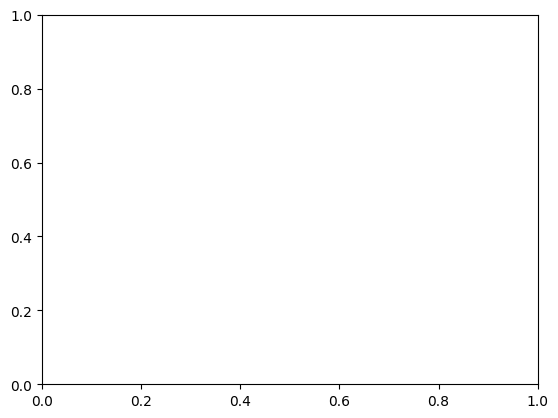

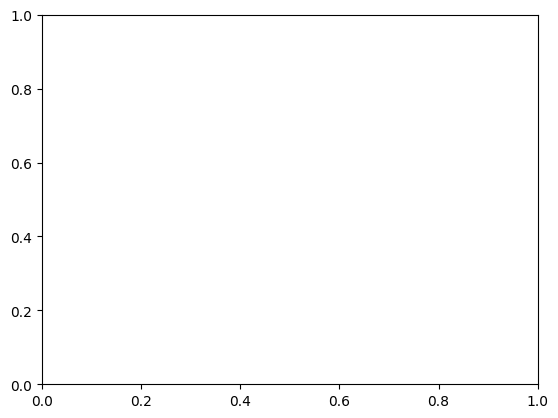

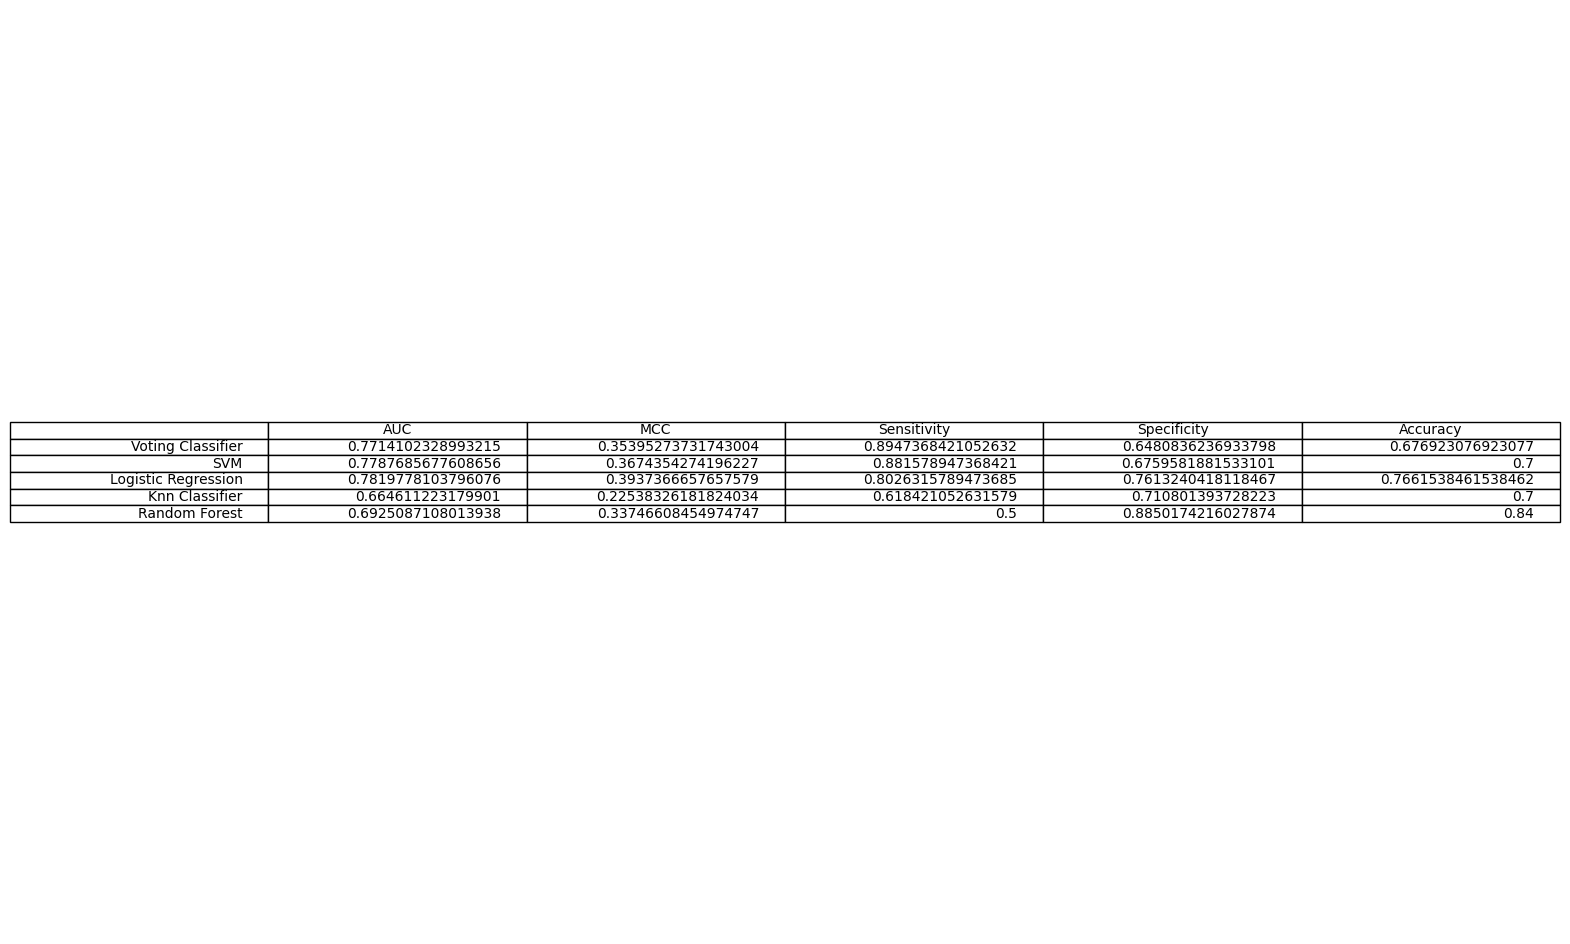

In [116]:
import matplotlib.pyplot as plt

# Define the classifiers and their corresponding metric values
classifiers = ['','Random Forest', 'SVM', 'Logistic Regression', 'Voting Classifier', 'Knn Classifier']
AUC = ['AUC', forest_auc, svm_auc, log_auc, voting_auc, knn_auc]
MCC = ['MCC', forest_mcc, svm_mcc, log_mcc, voting_mcc, knn_mcc]
Sensitivity = ['Sensitivity', sensitivity_forest, sensitivity_svm, sensitivity_log, sensitivity_voting,sensitivity_knn]
Specificity = ['Specificity', specificity_forest, specificity_svm, specificity_log, specificity_voting ,specificity_knn]
Accuracy = ['Accuracy', forest_accuracy, svm_accuracy, log_accuracy, voting_accuracy, knn_accuracy]

# Create the table as a matplotlib figure
fig, ax = plt.subplots()

# Define the table data as a list of lists
table_data = [
    classifiers,
    AUC,
    MCC,
    Sensitivity,
    Specificity,
    Accuracy
]




# Transpose the table data to have classifiers as columns
table_data = list(map(list, zip(*table_data)))


df = pd.DataFrame(table_data)
df = df.rename(columns=df.iloc[0]).loc[1:]



# # Set the index column as the index of the dataframe
df.set_index('', inplace=True)

# Convert numeric columns to numeric data type
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric)

# Sort the dataframe by all numeric columns in descending order
df = df.sort_values(by='Sensitivity', axis=0, ascending=False)

df=df.reset_index()

df
fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(20, 12))
# Plot the dataframe as a table
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center')

table
# Hide the x and y axis ticks
ax.axis('off')


# Save the table as a PNG image
plt.savefig('table.png', bbox_inches='tight')